## Import Section

In [55]:
import torch
import pandas as pd

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 

import seaborn as sns

import re

pd.set_option('display.max_columns', None)

### Importing Dataset

In [47]:
columnList = ['Nos','Conf Name','Abstract']
data = pd.read_csv("DBLPTrainset.txt", names=columnList, sep="\t")
data.head(10)

,Nos,Conf Name,Abstract
0,0,ISCAS,Scalable Serial-parallel Multiplier over GF(2m...
1,1,SIGGRAPH,Plenoptic sampling.
2,2,ISCAS,Sensitivity and uniformity of a 0.18micrometer...
3,3,WWW,A survey of web archive search architectures.
4,4,ISCAS,Understanding dynamic behavior of mm-wave CML ...
5,5,SIGGRAPH,Cosine lobe based relighting from gradient ill...
6,6,INFOCOM,Dimensioning an OBS Switch with Partial Wavele...
7,7,ISCAS,A study of identifibility for blind source sep...
8,8,ISCAS,A signal perturbation free semi-blind MRT MIMO...
9,9,ISCAS,A low-power V-band CMOS low-noise amplifier us...


### Data Exploration

In [48]:
#Listing out unique labels
print('List if labels ->',data['Conf Name'].unique())

print('Crude way of getting nos. of unique labels', data['Conf Name'].nunique())

List if labels -> ['ISCAS' 'SIGGRAPH' 'WWW' 'INFOCOM' 'VLDB']
Crude way of getting nos. of unique labels 5


In [49]:
print('Total Nos. of Labels and its counts:')
print(data['Conf Name'].value_counts())

Total Nos. of Labels and its counts:
ISCAS       7514
INFOCOM     4481
VLDB        3678
WWW         3292
SIGGRAPH    2678
Name: Conf Name, dtype: int64


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Classes')]

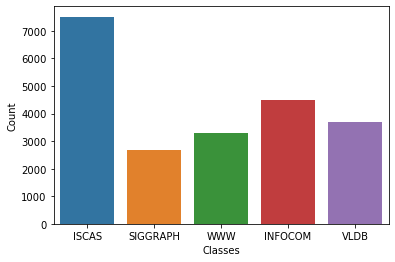

In [50]:
barGraph = sns.countplot(data['Conf Name'])
barGraph.set(xlabel = 'Classes', ylabel = 'Count')

In [51]:
#Checking if any record has missing Values
print('Total nos of rows with null/Nan values across the "Conf Name" column',data['Conf Name'].isnull().sum())

Total nos of rows with null/Nan values across the "Conf Name" column 0


### Data Preprocessing

In [44]:
lemmatizer = WordNetLemmatizer()

def preprocessing(sentence):
    text = str(sentence)
    text = text.lower()
    cleanr = re.compile('<.*?>')
    text = re.sub(cleanr, '', text)
    text = re.sub('[0-9]+','',text)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)
    

In [57]:
data['Abstract'] = data['Abstract'].apply(preprocessing)
data.head(10)

,Nos,Conf Name,Abstract
0,0,ISCAS,scalable serial parallel multiplier hierarchic...
1,1,SIGGRAPH,plenoptic sampling
2,2,ISCAS,sensitivity uniformity micrometer cmos tempora...
3,3,WWW,survey web archive search architecture
4,4,ISCAS,understanding dynamic behavior wave cml divide...
5,5,SIGGRAPH,cosine lobe based relighting gradient illumina...
6,6,INFOCOM,dimensioning switch partial wavelength convers...
7,7,ISCAS,study identifibility blind source separation v...
8,8,ISCAS,signal perturbation free semi blind mrt mimo c...
9,9,ISCAS,low power band cmos low noise amplifier using ...


,Nos,Conf Name,Abstract
0,0,ISCAS,scalable serial parallel multiplier hierarchic...
1,1,SIGGRAPH,plenoptic sampling
2,2,ISCAS,sensitivity uniformity micrometer cmos tempora...
3,3,WWW,survey web archive search architecture
4,4,ISCAS,understanding dynamic behavior wave cml divide...
5,5,SIGGRAPH,cosine lobe based relighting gradient illumina...
6,6,INFOCOM,dimensioning ob switch partial wavelength conv...
7,7,ISCAS,study identifibility blind source separation v...
8,8,ISCAS,signal perturbation free semi blind mrt mimo c...
9,9,ISCAS,low power band cmos low noise amplifier using ...


In [ ]:
https://towardsdatascience.com/multiclass-text-classification-using-lstm-in-pytorch-eac56baed8df